In [18]:
%%writefile Dash_1.py

import streamlit as st
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import string
import re
#%matplotlib inline
from textblob import TextBlob, Word, Blobber
from textblob.classifiers import NaiveBayesClassifier
from textblob.taggers import NLTKTagger
from PIL import Image
#import text2emotion as te
import os 
import base64
import warnings

st.set_page_config(layout='wide', initial_sidebar_state='expanded')

with open("C:/Users/Takudzwa Stephen/Desktop/Dirisa Hack/Day 2/dashboard-v2-master/dashboard-v2-master/style.css") as f:
    st.markdown(f'<style>{f.read()}</style>', unsafe_allow_html=True)

st.title("Service Delivery In South Africa")

st.sidebar.title('```DATATUDE```')
st.sidebar.write("`data attitude`")

Options = ["Sentiment Analysis", "Data Visualisation"]
bar = st.sidebar.selectbox("Select Option", Options)
if bar == "Sentiment Analysis" :
    st.write(data)
    
if bar =="Data Visualisation":
    st.text("We are doing visualization")

#st.sidebar.header('Choose an Option')

#st.sidebar.button("Sentiment Analysis")


st.header("Sentiment Analysis")

data = pd.read_csv("Data.csv")
st.header("Dataset")

if st.button("print dataset"):
    st.write(data)
if st.button("Number of rows & columns)"):
    print(st.write(data.shape))
if st.button("Attributes Names"):
    st.write("hello ")



Overwriting Dash_1.py


In [19]:
data

,byelecid,code,localelec,date1,year,province,muniname,ward,uncontested,turnoutpct,...,audit_good,audit_bad,audit_levels,contested,rural,death,competitive,majparty_anc,barriers,edu_matric_higher2011
0,2007-03-28_41602006,FS162,2006,2007-03-28,2007,FREE STATE,KOPANONG [TROMPSBURG],41602006,0,0.5659,...,0.0,1.0,-1.0,1,0.0,0,1.0,1,NaN,0.271393
1,2007-03-28_52602006,KZN262,2006,2007-03-28,2007,KWAZULU-NATAL,UPHONGOLO [PONGOLA],52602006,0,0.4964,...,0.0,1.0,-1.0,1,1.0,1,1.0,0,NaN,0.303389
2,2007-03-28_52802016,KZN282,2006,2007-03-28,2007,KWAZULU-NATAL,UMHLATHUZE [RICHARDS BAY],52802016,0,0.2959,...,0.0,0.0,0.0,1,0.0,1,1.0,0,NaN,0.533006
3,2007-03-28_64003003,NW403,2006,2007-03-28,2007,NORTH WEST,MATLOSANA [KLERKSDORP],64003003,0,0.2446,...,0.0,1.0,-1.0,1,0.0,1,0.0,1,NaN,0.373709
4,2007-03-28_74201023,GT421,2006,2007-03-28,2007,GAUTENG,EMFULENI [VEREENIGING],74201023,0,0.1474,...,0.0,1.0,-1.0,1,0.0,1,0.0,1,NaN,0.455830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,2015-11-11_83204020,MP324,2011,2015-11-11,2015,MPUMALANGA,NKOMAZI [NKOMAZI],83204020,0,0.1803,...,0.0,0.0,0.0,1,1.0,1,0.0,1,0.0,0.322695
945,2015-11-18_93607032,LIM367,2011,2015-11-18,2015,LIMPOPO,MOGALAKWENA [POTGIETERSRUS],93607032,0,0.3132,...,1.0,0.0,1.0,1,0.0,0,0.0,1,0.0,0.302097
946,2015-12-09_10405013,WC045,2011,2015-12-09,2015,WESTERN CAPE,OUDTSHOORN [OUDTSHOORN],10405013,0,0.4432,...,NaN,NaN,NaN,1,0.0,0,1.0,0,1.0,0.319273
947,2015-12-09_19100101,CPT,2011,2015-12-09,2015,WESTERN CAPE,CITY OF CAPE TOWN [CAPE TOWN],19100101,0,0.2532,...,NaN,NaN,NaN,1,0.0,0,0.0,0,0.0,0.466013


In [13]:
path = "C:/Users/Takudzwa Stephen/Desktop/Dirisa Hack/Day 2/dashboard-v2-master/dashboard-v2-master"

In [15]:
#def clean_text(text):
#    text=re.sub(r'@[Aa-z0-9]+','',text) # removed @@mentions
#    text=re.sub(r'#','',text) # removing the "#" symbol
#    text=re.sub(r'RT[\s]+','',text) #removing RT
#    text=re.sub(r'https?:\/\/\S+ :','',text) #Remove the link
#    return text

def clean_text(text):
    text=re.sub(r'@[A-Za-9]+','',text) # removed @@mentions
    text=re.sub('http\S+\s*','',text) # removing urls
    text=re.sub('RT|cc','',text) # removing RT and cc
    text=re.sub('#\S+','',text) #Remove #tags
    text=re.sub('@\S+','',text) # removing mentions
    text=re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_'{|}~"""),'', text) #Removepuncuations
    text=re.sub('\s+', ' ',text) # remove extra whitespaces
    
    return text

data['tweets']=data['text'].apply(clean_text)

if st.button("The cleans text tweets:"):
    st.write(data["tweets"])
    
if st.button("Drop duplicates records using drop_duplicates function."):
    data.drop_duplicates(subset="tweets", keep="first", inplace=True)
    st.write(data["tweets"])
    
st.text("Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means negetive sentiment")
st.text("subjective: means emotions expressed in a sentence. Emotions are closely related to sentiments.")

#create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#create two new columns
data["Subjectivity"]=data["tweets"].apply(getSubjectivity)
data["Polarity"]=data["tweets"].apply(getPolarity)

if st.button("The dataset with the Polarity and subjectivity added:"):
    st.write(data)
if st.button("Polarity"):
    st.write(data["Polarity"])
if st.button("Subjectivity"):
    st.write(data["Subjectivity"])
    
st.header("Data Visualisation")

st.text("Want to see how sentiments are distributed by understanding the commin words. plotting word cloud will help to")
st.text("Wordcloud is a visualisation where the more specific word appears in a text, the bigget and bolder it appears")

allwords=" ".join([twts for twts in data["tweets"]])
wordcloud=WordCloud(width=800, height=400, random_state=21, max_font=119).generate(allwords)

if st.button("Worldcloud"):
    st.set_option("deprecation.showPyplotGlobalUse",False)
    warnings.filterwarnings("ignore", category=DeprecationWarning)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    st.pyplot
    
if st.button("Wordcloud without the to frequency words:"):
    data["tweets"] = data["tweets"].str.replace("dropour rate", " ")
    data["tweets"] = data["tweets"].str.replace("dropour rate", " ")
    
#    return text

KeyError: 'text'

In [5]:
!pip install wordcloud
from textblob import TextBlob
from wordcloud import WordCloud

Defaulting to user installation because normal site-packages is not writeable


[nltk_data] Downloading package stopwords to C:\Users\Takudzwa
[nltk_data]     Stephen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


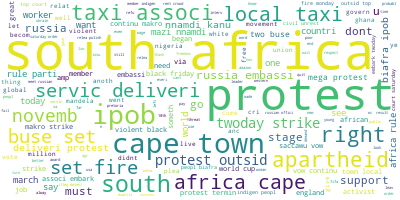

In [6]:
import nltk
nltk.download('stopwords')

import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

#df = pd.read_csv("C:/Users/Student/Desktop/Dirisa_2022/data1.csv")
df1 = pd.read_excel("C:/Users/Takudzwa Stephen/Desktop/Datasets/clean_protest_data.xlsx")

df1.drop_duplicates(subset = "text", keep = "first", inplace = True)

df1['text'] = df1['text'].str.replace(r"RT", " ")

import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+\www\S+",'', text, flags = re.MULTILINE)
    text = re.sub(r'@\S+','', str(text))
    text = re.sub(r'[^\w\s]','', text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

df1.text = df1['text'].apply(data_processing)

#stemming
import nltk
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

df1['text'] = df1['text'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))


from nltk.stem.wordnet import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
df1['text'] = df1['text'].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))
df1['text'].head()

def polarity(text):
    return TextBlob(text).sentiment.polarity

df1['polarity'] = df1['text'].apply(polarity)

def sentiment(label):
    if label < 0:
        return "negative"
    elif label == 0:
        return "neutral"
    elif label > 0:
        return "positive"
    
df1['sentiment'] = df1['polarity'].apply(sentiment)

# wordcloud library
from wordcloud import WordCloud

# joing the different text together
long_string = ','.join(list(df1['text'].values))

#create the Wordcloud
wordcloud = WordCloud(background_color = "white", max_words = 5000, contour_width = 3, contour_color = 'stealblue')

#generate a word clcoud 
wordcloud.generate(long_string)

#visualise the word cloud 
wordcloud.to_image()